### **Import Libraries & Setup**

In [3]:
# Import Library
import pandas as pd
import numpy as np
import os 
from src.utils import extract_multi_csv
from config.setting import PRODUCTS_PATH

### **Data Ingestion**

In [4]:
# Ingest Data
file_list = os.listdir(PRODUCTS_PATH)

# Extract Data Product 
df_product_original = extract_multi_csv(PRODUCTS_PATH)

# Membuat Staging Area
df_products = df_product_original.copy()
df_products.drop(columns='Unnamed: 0', inplace=True)

# Preview Data
df_products.head()


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


### **Data Profiling**

In [5]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103170 entries, 0 to 1103169
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   name            1103170 non-null  object
 1   main_category   1103170 non-null  object
 2   sub_category    1103170 non-null  object
 3   image           1103170 non-null  object
 4   link            1103170 non-null  object
 5   ratings         751582 non-null   object
 6   no_of_ratings   751582 non-null   object
 7   discount_price  980844 non-null   object
 8   actual_price    1067544 non-null  object
dtypes: object(9)
memory usage: 75.7+ MB


In [6]:
df_products.isnull().sum()

name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           351588
no_of_ratings     351588
discount_price    122326
actual_price       35626
dtype: int64

### **Data Cleaning & Handling Missing**

In [7]:
df_products['ratings'].unique()

array(['4.2', '4.0', '4.1', '4.3', '3.9', '3.8', '3.5', nan, '4.6', '3.3',
       '3.4', '3.7', '2.9', '5.0', '4.4', '3.6', '2.7', '4.5', '3.0',
       '3.1', '3.2', '4.8', '4.7', '2.5', '1.0', '2.6', '2.8', '2.3',
       '1.7', 'Get', '1.8', '2.4', '4.9', '2.2', '1.6', '1.9', '2.0',
       '1.4', '2.1', 'FREE', '1.2', '1.3', '1.5', '₹68.99', '₹65', '1.1',
       '₹70', '₹100', '₹99', '₹2.99', 4.0, 3.7, 3.4, 4.1, 3.8, 3.6, 4.2,
       3.9, 3.2, 3.5, 5.0, 3.3, 2.6, 4.5, 4.3, 4.7, 3.0, 3.1, 4.4, 4.6,
       1.0, 4.9, 2.9, 2.7, 2.2, 2.5, 4.8, 2.0, 1.7, 1.9, 2.8, 2.4, 1.6,
       2.3, 1.8, 1.4, 1.3, 2.1, 1.5], dtype=object)

Kolom **`ratings`** masih berisi data yang tidak seragam, seperti teks non-numerik ("FREE", "Get") dan nilai berbentuk mata uang ("₹68.99", "₹100"), serta campuran tipe string dan float. Agar dapat dianalisis, kolom ini perlu dibersihkan dengan menghapus nilai tidak valid, membatasi hanya angka dalam rentang 1.0–5.0, lalu mengubahnya ke format numerik `float`.

In [8]:
# mengubah format jadi dari object jadi numeric
df_products['ratings'] = pd.to_numeric(df_products['ratings'], errors='coerce').astype(float)

In [9]:
# Preview Hasil
df_products['ratings'].unique()

array([4.2, 4. , 4.1, 4.3, 3.9, 3.8, 3.5, nan, 4.6, 3.3, 3.4, 3.7, 2.9,
       5. , 4.4, 3.6, 2.7, 4.5, 3. , 3.1, 3.2, 4.8, 4.7, 2.5, 1. , 2.6,
       2.8, 2.3, 1.7, 1.8, 2.4, 4.9, 2.2, 1.6, 1.9, 2. , 1.4, 2.1, 1.2,
       1.3, 1.5, 1.1])

In [10]:
df_products['no_of_ratings'].unique() 

array(['2,255', '2,948', '1,206', ..., 5.0, 15.0, 8.0],
      shape=(8381,), dtype=object)

sama halnya dengan kolom 'no_of_ratings' perlu di format dari 'object' menjadi 'numeric'

In [11]:
# mengubah jadi numeric
df_products['no_of_ratings'] = pd.to_numeric(df_products['no_of_ratings'].str.replace(",", ""),errors='coerce')
df_products['no_of_ratings'] = df_products['no_of_ratings'].fillna(0)
df_products['no_of_ratings'] = df_products['no_of_ratings'].astype('Int64')

In [12]:
df_products['no_of_ratings'].unique() 

<IntegerArray>
[ 2255,  2948,  1206,    69,   630,  1666,  1097,  1494,   674,   801,
 ...
  6216,  5916,  3116,  5183, 67255,  5603, 55051,  3329,  7141,  4406]
Length: 8285, dtype: Int64

In [13]:
df_products['actual_price'].unique()

array(['₹58,990', '₹75,990', '₹61,990', ..., '₹608.97', '₹4,792',
       '₹8,023.60'], shape=(23171,), dtype=object)

In [14]:
df_products['discount_price'].unique()

array(['₹32,999', '₹46,490', '₹34,490', ..., '₹3,712.10', '₹1,429.60',
       '₹651.01'], shape=(27512,), dtype=object)

Dataset memiliki dua kolom utama terkait harga:  

- **`discount_price`** → harga produk setelah diskon, masih dalam format string dengan simbol mata uang (`₹`) dan tanda pemisah ribuan (`,`).  
- **`actual_price`** → harga asli produk sebelum diskon, juga masih berupa string dengan simbol mata uang dan pemisah ribuan.  

Agar dapat dianalisis lebih lanjut, diperlukan beberapa langkah pembersihan data:  

1. Membuat kolom baru bernama **`currency`** untuk menyimpan simbol mata uang (misalnya `₹`, `$`, `Rp`).  
2. Menghapus simbol mata uang dan tanda pemisah ribuan dari kolom harga.  
3. Mengonversi nilai harga ke tipe numerik (`float64`).  

Dengan cara ini, informasi harga tetap terjaga dan analisis lintas mata uang dapat dilakukan dengan lebih fleksibel.  

Kolom discount_price masih berisi nilai harga dalam format string yang disertai simbol mata uang (₹) serta tanda pemisah ribuan (,). Kondisi ini membuat kolom belum bisa diolah sebagai data numerik. Agar dapat dianalisis, langkah yang perlu dilakukan adalah membersihkan data dengan cara menghapus simbol mata uang dan tanda pemisah, lalu mengonversinya ke tipe numerik (float64). Dengan begitu, nilai harga dapat digunakan untuk perhitungan statistik maupun analisis perbandingan harga.

In [15]:
# Discount_Price
df_products['discount_price'] = pd.to_numeric(df_products['discount_price'].str.replace(r'[₹,]','', regex=True),errors='coerce')

# Actual Price
df_products['currency']= df_products['actual_price'].str[:1] # membuat kolom baru currency "₹"
df_products['actual_price'] = df_products['actual_price'].str.replace(r'[₹,]','', regex=True).astype(float)

Setelah dianalisis, ternyata memang beberapa row memiliki harga 0, kita akan mengubahnya untuk menjadi NaN.

In [16]:
df_products['actual_price'] = df_products['actual_price'].replace(0,np.nan)

In [17]:
# Membuat discount_percentage
df_products['discount_percentage'] = ((df_products['actual_price'] - df_products['discount_price']) / df_products['actual_price'] * 100).round(1)

In [18]:
# Preview 'df_product'
df_products.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,currency,discount_percentage
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255,32999.0,58990.0,₹,44.1
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948,46490.0,75990.0,₹,38.8
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,1206,34490.0,61990.0,₹,44.4
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,37990.0,68990.0,₹,44.9
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,34490.0,67790.0,₹,49.1


### **Exploratory Analysis**  

## Pendahuluan

Sebelum mulai eksplorasi/analisis data, kita perlu lihat gambaran umum dataset.  
Tujuannya biar tahu struktur, tipe data, dan kondisi awal sebelum diolah lebih lanjut.  

Beberapa fungsi yang sering dipakai untuk data overview:  
- `df_products.head()` → lihat beberapa baris pertama  
- `df_products.info()` → lihat tipe data & missing values  
- `df_products.describe()` → statistik deskriptif kolom numerik  
- `df_products.shape` → cek jumlah baris & kolom  




Untuk memulai analisis, kita terlebih dahulu melihat gambaran umum dataset ini.  
Dataset mencakup lebih dari **1,1 juta produk e-commerce** dengan beberapa informasi penting, seperti:  

- **Kategori** → `main_category`, `sub_category`  
- **Harga** → `actual_price`, `discount_price`, `currency`  
- **Diskon** → `discount_percentage`  
- **Kualitas produk** → `ratings`  
- **Popularitas** → `no_of_ratings`  

Pada analisis kali ini, fokus utama kita adalah **Price & Discount Strategy**,  
karena faktor harga dan promo biasanya menjadi penentu terbesar dalam perilaku konsumen di marketplace.


In [19]:
df_products.columns

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price', 'currency',
       'discount_percentage'],
      dtype='object')

In [20]:
df_products.shape

(1103170, 11)

In [21]:
# Mengecek missing values pada setiap kolom
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103170 entries, 0 to 1103169
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   name                 1103170 non-null  object 
 1   main_category        1103170 non-null  object 
 2   sub_category         1103170 non-null  object 
 3   image                1103170 non-null  object 
 4   link                 1103170 non-null  object 
 5   ratings              739116 non-null   float64
 6   no_of_ratings        1103170 non-null  Int64  
 7   discount_price       980844 non-null   float64
 8   actual_price         1067538 non-null  float64
 9   currency             1067544 non-null  object 
 10  discount_percentage  980844 non-null   float64
dtypes: Int64(1), float64(4), object(6)
memory usage: 93.6+ MB


In [22]:
df_products.describe()

,ratings,no_of_ratings,discount_price,actual_price,discount_percentage
count,739116.000000,1103170.0,9.808440e+05,1.067538e+06,980844.000000
mean,3.832311,563.313476,2.623161e+03,2.311141e+04,49.255919
std,0.756101,7092.570454,9.458191e+03,1.355085e+07,21.400565
min,1.000000,0.0,8.000000e+00,4.000000e+00,0.000000
25%,3.500000,0.0,3.890000e+02,9.900000e+02,35.000000
50%,3.900000,4.0,6.790000e+02,1.599000e+03,50.200000
75%,4.300000,49.0,1.399000e+03,2.999000e+03,65.800000
max,5.000000,589547.0,1.249990e+06,9.900000e+09,100.000000


In [23]:
df_products.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,currency,discount_percentage
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255,32999.0,58990.0,₹,44.1
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948,46490.0,75990.0,₹,38.8
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,1206,34490.0,61990.0,₹,44.4
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,37990.0,68990.0,₹,44.9
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,34490.0,67790.0,₹,49.1


In [24]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103170 entries, 0 to 1103169
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   name                 1103170 non-null  object 
 1   main_category        1103170 non-null  object 
 2   sub_category         1103170 non-null  object 
 3   image                1103170 non-null  object 
 4   link                 1103170 non-null  object 
 5   ratings              739116 non-null   float64
 6   no_of_ratings        1103170 non-null  Int64  
 7   discount_price       980844 non-null   float64
 8   actual_price         1067538 non-null  float64
 9   currency             1067544 non-null  object 
 10  discount_percentage  980844 non-null   float64
dtypes: Int64(1), float64(4), object(6)
memory usage: 93.6+ MB


In [25]:
# Sebelum masuk ke analisa, mari kita coba eksplorasi dataset ini. Dataset berisi lebih dari 1,1 juta produk e-commerce dengan informasi:

# Kategori (main_category, sub_category)

# Harga (actual_price, discount_price, currency)

# Diskon (discount_percentage)

# Kualitas produk (ratings)

# Popularitas (no_of_ratings)

# Fokus analisis kita kali ini adalah Price & Discount Strategy, karena harga dan promo biasanya paling memengaruhi perilaku konsumen di marketplace.

Sebelum masuk ke analisa, mari kita coba eksplorasi dataset ini. Dataset berisi lebih dari 1,1 juta produk e-commerce dengan informasi:

Kategori (main_category, sub_category)

Harga (actual_price, discount_price, currency)

Diskon (discount_percentage)

Kualitas produk (ratings)

Popularitas (no_of_ratings)

Fokus analisis kita kali ini adalah Price & Discount Strategy, karena harga dan promo biasanya paling memengaruhi perilaku konsumen di marketplace.

Top 10 Categories by Number of Products


In [26]:
df_products.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,currency,discount_percentage
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255,32999.0,58990.0,₹,44.1
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948,46490.0,75990.0,₹,38.8
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,1206,34490.0,61990.0,₹,44.4
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,37990.0,68990.0,₹,44.9
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,34490.0,67790.0,₹,49.1


In [31]:
df_products.columns

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price', 'currency',
       'discount_percentage'],
      dtype='object')

**Top 10 Categories by Number of Products (Bar Chart)**

In [36]:
df_products.groupby('main_category').agg(total_product=("name","count")).sort_values("total_product",ascending=False).head(10)

,total_product
main_category,
accessories,232282
men's clothing,153312
women's clothing,153024
"tv, audio & cameras",137318
men's shoes,114912
appliances,66192
stores,65806
home & kitchen,29136
kids' fashion,26976


**Note**
- **Accessories (232k)**, **Men’s Clothing (153k)**, **Women’s Clothing (153k)** → kategori terbesar & sangat kompetitif.  
- **Kids’ Fashion (26k)** dan **Sports & Fitness (25k)** relatif kecil → peluang penetrasi pasar lebih tinggi.  

**Average Price per Category (Top 10 by Price)**

In [34]:
df_products.groupby('main_category').agg(avg_price=("actual_price","mean")).sort_values("avg_price",ascending=False).head(10)

,avg_price
main_category,
home & kitchen,685834.564014
accessories,8136.306196
appliances,8132.086333
sports & fitness,8084.115472
"tv, audio & cameras",5725.719018
music,5621.817669
stores,4959.771051
"home, kitchen, pets",4468.117647
bags & luggage,4047.907297


**Note**
- **Home & Kitchen (±685k)** jadi outlier → indikasi data ekstrim atau positioning premium.  
- Premium categories: **Accessories (8.1k)**, **Appliances (8.1k)**, **Sports & Fitness (8k)**.  
- **Men’s Shoes (3.8k)** dan **Bags & Luggage (4k)** → mass-market.  

**Average Discount per Category (Top 10 by Discount %)**

In [38]:
df_products.groupby("main_category").agg(avg_discount_rate=("discount_percentage","mean")).sort_values("avg_discount_rate", ascending=False).head(10)

,avg_discount_rate
main_category,
women's clothing,59.608691
accessories,52.910485
stores,51.882326
bags & luggage,50.347904
"tv, audio & cameras",48.836491
home & kitchen,48.218667
sports & fitness,48.009705
car & motorbike,46.917972
men's clothing,46.354725


**Discount vs Popularity (Scatter Plot)**

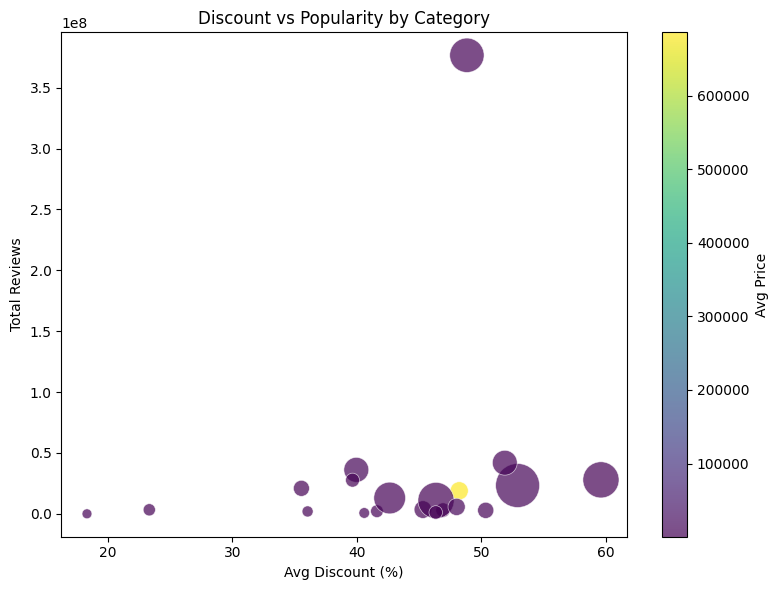

In [39]:
import matplotlib.pyplot as plt

sc = (
df_products.groupby("main_category")
.agg(
avg_discount_pct=("discount_percentage", "mean"),
total_reviews=("no_of_ratings", "sum"),
avg_price=("actual_price", "mean"),
total_products=("name", "count")
)
.dropna()
.reset_index()
)


sizes = sc["total_products"].astype(float)
sizes = 50 + (sizes - sizes.min()) / (sizes.max() - sizes.min() + 1e-9) * 950


plt.figure(figsize=(8,6))
scatter = plt.scatter(
sc["avg_discount_pct"], sc["total_reviews"],
s=sizes,
c=sc["avg_price"], cmap='viridis', alpha=0.7, edgecolors='w', linewidths=0.5
)
plt.title("Discount vs Popularity by Category")
plt.xlabel("Avg Discount (%)")
plt.ylabel("Total Reviews")
cb = plt.colorbar(scatter)
cb.set_label("Avg Price")
plt.tight_layout()
plt.show()

**Note**
- Diskon tinggi ≠ populeritas tinggi.  
- Beberapa kategori dengan review besar tetap populer meski diskon moderat → **brand trust & kualitas produk** lebih penting.  
- Fashion categories jenuh: diskon besar tapi tidak selalu meningkatkan review.  


## Business Insights
1. Fashion categories are discount-driven but oversaturated
Meski diskonnya besar (50–60%), kategori fashion seperti **women’s clothing** dan **accessories** tetap sangat kompetitif.  
-> Diskon saja tidak cukup untuk memenangkan pasar — perlu **brand positioning, niche targeting, dan program loyalitas**.

2. Premium categories thrive on value, not price cuts
Produk mahal seperti **home & kitchen** dan **appliances** punya daya jual tinggi meski tanpa diskon besar.  
-> Pelanggan segmen ini lebih peduli pada **kualitas, bundling, garansi, dan layanan after-sales** dibanding potongan harga.

3. Trust signals outperform discounts
Analisis scatter plot menunjukkan kategori dengan **review banyak lebih populer**, meski diskonnya tidak terlalu besar.  
➡️ **Customer trust (review & rating)** terbukti lebih efektif mendorong penjualan daripada sekadar perang harga.